In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import pandas as pd
import math
%matplotlib inline



In [2]:
url = 'https://twoldem-ml.s3.us-east-2.amazonaws.com/beerratings_edited.csv'

data = pd.read_csv(url)

data.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent


In [3]:
# data = pd.read_csv('beerratings_edited.csv')
# data.head()

In [4]:
data_count = data.describe().transpose()
data_count

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1586614.0,793306.500000,458016.154338,0.00,396653.25,793306.5,1189959.75,1586613.0
brewery_id,1586614.0,3130.099202,5578.103987,1.00,143.00,429.0,2372.00,28003.0
review_overall,1586614.0,3.815581,0.720622,0.00,3.50,4.0,4.50,5.0
review_aroma,1586614.0,3.735636,0.697617,1.00,3.50,4.0,4.00,5.0
review_appearance,1586614.0,3.841642,0.616093,0.00,3.50,4.0,4.00,5.0
review_palate,1586614.0,3.743701,0.682218,1.00,3.50,4.0,4.00,5.0
review_taste,1586614.0,3.792860,0.731970,1.00,3.50,4.0,4.50,5.0
beer_abv,1518829.0,7.042387,2.322526,0.01,5.20,6.5,8.50,57.7
beer_beerid,1586614.0,21712.794279,21818.335997,3.00,1717.00,13906.0,39441.00,77317.0


In [5]:
data.drop(columns=['Unnamed: 0'])

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,excellent
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,excellent
1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,excellent
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,excellent


In [6]:
#looking for null data

data.isnull().sum()

Unnamed: 0                0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
excellent_reviews         7
dtype: int64

In [7]:
#replacing nulls with column means
column_means = data['beer_abv'].mean()
data['beer_abv'] = data['beer_abv'].fillna(column_means)
print(data)

         Unnamed: 0  brewery_id                 brewery_name  \
0                 0       10325              Vecchio Birraio   
1                 1       10325              Vecchio Birraio   
2                 2       10325              Vecchio Birraio   
3                 3       10325              Vecchio Birraio   
4                 4        1075      Caldera Brewing Company   
...             ...         ...                          ...   
1586609     1586609       14359  The Defiant Brewing Company   
1586610     1586610       14359  The Defiant Brewing Company   
1586611     1586611       14359  The Defiant Brewing Company   
1586612     1586612       14359  The Defiant Brewing Company   
1586613     1586613       14359  The Defiant Brewing Company   

                 review_time  review_overall  review_aroma  review_appearance  \
0        2009-02-16 20:57:03             1.5           2.0                2.5   
1        2009-03-01 13:44:57             3.0           2.5           

In [8]:
#making sure there are no null reviews 

data.isnull().sum()

Unnamed: 0              0
brewery_id              0
brewery_name           15
review_time             0
review_overall          0
review_aroma            0
review_appearance       0
review_profilename    348
beer_style              0
review_palate           0
review_taste            0
beer_name               0
beer_abv                0
beer_beerid             0
excellent_reviews       7
dtype: int64

In [9]:
#need to update these with the mean scores, there are some nulls above in excellent_reviews
data.drop(columns=['excellent_reviews'])

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [10]:
#updating excellent reivews column
cut_reviews = ["not excellent", "excellent"]
review_bins = [0, 3.5, 5.0]
data['excellent_reviews'] = pd.cut(data['review_overall'], bins=review_bins, labels= cut_reviews)
data.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent


In [11]:
#looking at data distribution across the two groups

data['excellent_reviews'].value_counts()

excellent        998469
not excellent    588138
Name: excellent_reviews, dtype: int64

# Brewery Work

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [13]:
#the breweries are the index, so I made a new column with the brewery names
data['breweries'] = data["brewery_name"]
data.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews,breweries
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent,Vecchio Birraio
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent,Vecchio Birraio
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent,Vecchio Birraio
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent,Vecchio Birraio
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent,Caldera Brewing Company


In [14]:
#Graphing brewery reviews

brew = data.groupby(by="brewery_name")

mean = brew['review_overall'].mean()
median =brew['review_overall'].median()
std = brew['review_overall'].std()
SEM = brew['review_overall'].sem()
counts = brew['review_overall'].count()
taste = brew['review_taste'].mean()
# breweries = brew['breweries'].unique_values()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
brew = pd.DataFrame({"Mean Review": mean, "Mean Taste Review":taste, "Median Review": median, "Standard Deviation": std, "SEM": SEM, "Number of Reviews": counts})

#print table
brew

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
brewery_name,,,,,,
't Hofbrouwerijke,3.702703,3.621622,4.00,0.628705,0.103359,37
(512) Brewing Company,4.065789,4.055921,4.00,0.564880,0.032398,304
10 Barrel Brewing Co.,3.732143,3.636905,4.00,0.517445,0.056458,84
1516 Brewing Company,4.132353,4.073529,4.25,0.512108,0.087826,34
16 Mile Brewing Company,3.570652,3.472826,3.50,0.665399,0.069373,92
...,...,...,...,...,...,...
Ölvisholt Brugghús,3.912371,3.876289,4.00,0.661478,0.067163,97
Öufi Brauerei,3.500000,3.500000,3.50,NaN,NaN,1
Ølfabrikken,4.069966,4.198805,4.00,0.564826,0.023333,586


In [15]:
#mean number of reviews per brewery and standard deviation

meancounts = brew['Number of Reviews'].mean()
meancountsstd = brew['Number of Reviews'].std()

#ceiling outliers
meancounts + 2*meancountsstd

3277.1960452220655

In [16]:
meancounts

276.31469871125046

In [17]:
#floor outliers
meancounts - 2*meancountsstd

#the data are really rightward skewed, so this isn't helpful

-2724.5666477995646

NameError: name 'fig' is not defined

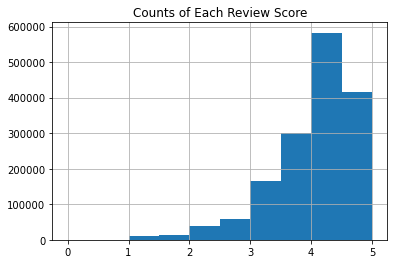

In [18]:
#histogram of the number of reviews for each review score
allreviews = data['review_overall']
countsdf = pd.DataFrame({"Counts of Each Review Score": allreviews})
countsdf.hist()
# pyplot.show()
fig.savefig("CountsofEachReviewCategory.png",bbox_inches='tight', facecolor='w')

In [19]:
#updating the database to only include breweries with the mean number of reviews or higher

brew = brew[brew['Number of Reviews'] >= meancounts]
brew.head()

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
brewery_name,,,,,,
(512) Brewing Company,4.065789,4.055921,4.0,0.564880,0.032398,304
21st Amendment Brewery,3.699295,3.631464,4.0,0.722722,0.013244,2978
AMB - Maître Brasseur,3.197568,3.171733,3.5,0.844924,0.046582,329
Abbaye de Leffe S.A.,3.685880,3.655819,4.0,0.632699,0.014859,1813
Abita Brewing Co.,3.558802,3.420945,3.5,0.692564,0.009462,5357


In [ ]:
# brew['Index']= brew.reset_index()
# brew.head()

In [20]:
my_list = brew.columns.values.tolist()
my_list

['Mean Review',
 'Mean Taste Review',
 'Median Review',
 'Standard Deviation',
 'SEM',
 'Number of Reviews']

In [ ]:
# brewlist = brew.index.values.tolist()
# brewlist

In [21]:
brew.sort_values(by=['Mean Review'], inplace=True, ascending=False)
brew.head()

/Users/chilon/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
brewery_name,,,,,,
The Alchemist,4.582543,4.572106,4.5,0.384241,0.016738,527
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren),4.544996,4.588520,4.5,0.468254,0.009602,2378
Russian River Brewing Company,4.373884,4.409999,4.5,0.507838,0.004775,11311
Live Oak Brewing Company,4.313356,4.208048,4.5,0.603244,0.024962,584
Hill Farmstead Brewery,4.297191,4.296865,4.5,0.434070,0.011094,1531


In [23]:
#grabbing the top 10 breweries
brewtop = brew.head(10)
brewtop.head()

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
brewery_name,,,,,,
The Alchemist,4.582543,4.572106,4.5,0.384241,0.016738,527
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren),4.544996,4.588520,4.5,0.468254,0.009602,2378
Russian River Brewing Company,4.373884,4.409999,4.5,0.507838,0.004775,11311
Live Oak Brewing Company,4.313356,4.208048,4.5,0.603244,0.024962,584
Hill Farmstead Brewery,4.297191,4.296865,4.5,0.434070,0.011094,1531


In [24]:
#making the top breweries a list so that we can add them to the x-axis
brewlist = brewtop.index.values.tolist()
brewlist

['The Alchemist',
 'Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren)',
 'Russian River Brewing Company',
 'Live Oak Brewing Company',
 'Hill Farmstead Brewery',
 'Brouwerij Drie Fonteinen',
 'Kern River Brewing Company',
 'Bayerische Staatsbrauerei Weihenstephan',
 'The Alchemist Pub & Brewery',
 'Brasserie de Rochefort']

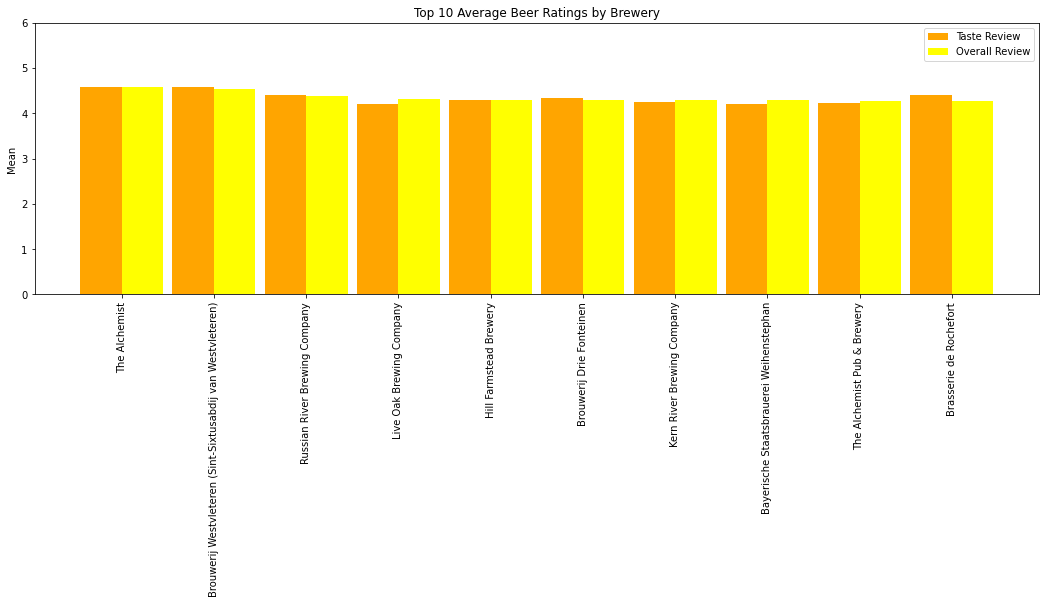

In [25]:
#making a graph that represents the top 10 highest rated (overall) breweries that also includes the taste review

meanbrew = brewtop["Mean Review"] 
counts = brewtop["Mean Taste Review"] 


x = np.arange(len(brewlist))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, counts, width, label='Taste Review', color="orange")
rects2 = ax.bar(x + width/2, meanbrew, width, label='Overall Review', color="yellow")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean')
ax.set_ylim([0,6])
ax.set_title('Top 10 Average Beer Ratings by Brewery')
ax.set_xticks(x)
ax.set_xticklabels(brewlist, rotation=90)
ax.legend()

fig.savefig("Top10AverageBeerRatingsBreweries.png",bbox_inches='tight', facecolor='w')

In [31]:
#sorting the data by the count of reviews for the next graph
brewtop.sort_values(by=['Number of Reviews'], inplace=True, ascending=False)
brewtop.head()

/Users/chilon/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews,Breweries
brewery_name,,,,,,,
Russian River Brewing Company,4.373884,4.409999,4.5,0.507838,0.004775,11311,Russian River Brewing Company
Bayerische Staatsbrauerei Weihenstephan,4.287127,4.201627,4.5,0.546450,0.006902,6269,Bayerische Staatsbrauerei Weihenstephan
Brasserie de Rochefort,4.267913,4.409546,4.5,0.540777,0.008067,4494,Brasserie de Rochefort
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren),4.544996,4.588520,4.5,0.468254,0.009602,2378,Brouwerij Westvleteren (Sint-Sixtusabdij van W...
Brouwerij Drie Fonteinen,4.291966,4.333034,4.5,0.537894,0.013170,1668,Brouwerij Drie Fonteinen


/Users/chilon/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


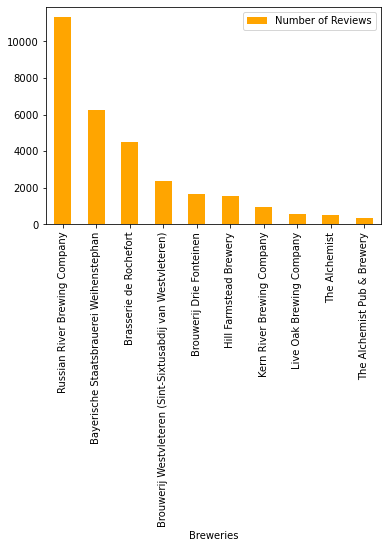

In [28]:
#checking the number of reviews used to calculate the highest rated breweries

brewtop['Breweries'] = brewtop.index.values.tolist()

brewtop.plot.bar(x='Breweries', y='Number of Reviews', rot=90, color="orange")

fig.savefig("ReviewCountforTopRatedBreweries.png",bbox_inches='tight', facecolor='w')

# Beer Type 

In [ ]:
# group by beers

#Graphing brewery reviews

brew2 = data.groupby(by="beer_style")

mean2 = brew2['review_overall'].mean()
median2 =brew2['review_overall'].median()
std2 = brew2['review_overall'].std()
SEM2 = brew2['review_overall'].sem()
counts2 = brew2['review_overall'].count()
taste2 = brew2['review_taste'].mean()
# breweries = brew['breweries'].unique_values()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
brew2 = pd.DataFrame({"Mean Review": mean2, "Mean Taste Review":taste2, "Median Review": median2, "Standard Deviation": std2, "SEM": SEM2, "Number of Reviews": counts2})

#print table
brew2

In [ ]:
brew2.sort_values(by=['Mean Review'], inplace=True, ascending=False)
brew2.head()

In [ ]:
brewtop2 = brew2.head(10)

brewlist2 = brewtop2.index.values.tolist()
brewlist2

In [ ]:
brewtop2.head()

In [ ]:
#making a top rated beer graph using overall rating and also including the taste review

meanbrew2 = brewtop2["Mean Review"] 
counts2 = brewtop2["Mean Taste Review"] 


x = np.arange(len(brewlist2))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, counts2, width, label='Taste Review', color="orange")
rects2 = ax.bar(x + width/2, meanbrew2, width, label='Overall Review', color="yellow")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean')
ax.set_ylim([0,5])
ax.set_title('Top 10 Average Beer Ratings by Beer Type')
ax.set_xticks(x)
ax.set_xticklabels(brewlist2, rotation=90)
ax.legend()

fig.savefig("TopRatedBeers.png",bbox_inches='tight', facecolor='w')

In [ ]:
#checking the number of reviews for the top rated beers

brewtop2['Beer Names'] = brewtop2.index.values.tolist()

brewtop2.plot.bar(x='Beer Names', y='Number of Reviews', rot=90, color="orange")

fig.savefig("ReviewCountforTopRatedBeers.png",bbox_inches='tight', facecolor='w')

In [ ]:
brewtop2.head()

In [ ]:
import seaborn as sns

In [ ]:
#violin plots to look at the distribution of excellent and not excellent beer reviews by beer ABV

ax = sns.violinplot(x="excellent_reviews", y="beer_abv", data=data)
plt.tight_layout()
plt.savefig("violin.png",bbox_inches='tight', edgecolor='w', facecolor='w', format="png")

In [ ]:
reviews = data['excellent_reviews']
abv= data['beer_abv']

df = pd.DataFrame({"Reviews": reviews, "abv": abv})

In [ ]:
#boxplot of ABV
from matplotlib import pyplot

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
# pyplot.show()
plt.autoscale()

plt.savefig("abvbox.png",bbox_inches='tight', edgecolor='w', facecolor= 'w', format="png")

In [ ]:
#histogram of ABV- leftward skew

df.hist()
pyplot.show()